<a href="https://colab.research.google.com/github/EddyGiusepe/Machine_Learning/blob/main/5_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Machine Learning: Classificação</h2>



Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Aqui aprenderemos a tarefa de `Classificação`. A diferença da Regressão, na qual o objetivo era predezir o valor de uma variável com respeito a diferentes características, em classificação o objetivo é atribuir uma classe (Etiqueta, Label ... são os nomes comuns) a partir das diferentes características. <font color="orange">Por exemplo:</font> a classificação de imagens; onde se tenta atribuir uma etiqueta em função do valor dos píxeis.

# Regressão Logística

Este modelo leva no nome **regressão** mas, realmente é un modelo de **classificação**. Se chama asim porque o modelo usado é o mesmo que usamos em scripts anteriores para `Regressão linear`, aplicando uma <font color="orange">função sigmoid</font> à saída do modelo. Esta função transformará o valor da saída num valor entre $0$ e $1$ que pode ser **interpretado como uma probabilidad**. Aplicando um umbral à saída poderemos decidir se a amostra em questão pertence a uma classe ou não (<font color="orange">por exemplo</font>: se a probabilidade é maior do $50\%$). Asim pois, este modelo não servirá para a tarefa de <font color="orange">classificação binaria</font>.

$$
  \hat{y} = \sigma(w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n)
$$

onde <font color="orange">$\sigma(t) = \frac{1}{1 + e^{-t}}$</font> é a função sigmoidal.

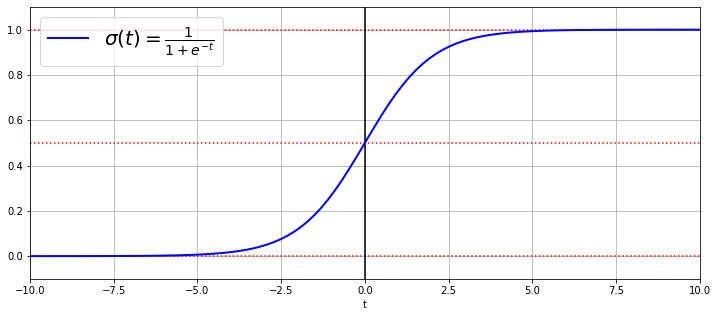

In [11]:
import numpy as np 
import matplotlib.pyplot as plt


t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))


plt.figure(figsize=(12, 5))
plt.plot([-10, 10], [0, 0], "r:")
plt.plot([-10, 10], [0.5, 0.5], "r:")
plt.plot([-10, 10], [1, 1], "r:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.grid(True)
plt.show()

A seguir vamos a realizar um exemplo aplicado à CLASSIFICAÇÃO DE FLORES com o [Dataset Iris](https://www.kaggle.com/datasets/arshid/iris-flower-dataset), cujo objetivo é classificar flores em $3$ classes distintas em função do tamanho (comprimento e largura) de seus pétalos e sépalos (quatro características).

In [19]:
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

# Carregamos nossos Dados
iris = datasets.load_iris()

Para começar de maneira mais simples vamos usar apenas uma característica (a largura dos pétalos) e para a classificação binária ficaremos apenas como uma classe.

In [20]:
X = iris["data"][:, 3:]  # petal width

y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [21]:
X.shape

(150, 1)

In [22]:
y.shape

(150,)

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
# Treinamos
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [24]:
X_new = [[1.7], [1.5]]
# predict --> para fazer prediçoes
y_new = log_reg.predict(X_new)
y_new

array([1, 0])

<font color="orange">Podemos observar que uma flor com largura de pétalo de $1.7$ é classificada como o tipo de Iris Virginica e para uma largura de $1.5$ não é Iris Virginica.</font>

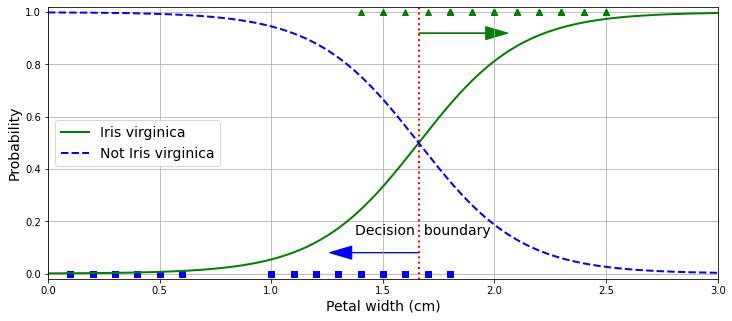

In [30]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]


plt.figure(figsize=(12, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "r:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.grid(True)
plt.show()